**TASK 2**

In [ ]:
students = {
    1:{"name": "Ali", "age": 20,"roll_number":"SP23-BCS-10","grade":"A"},
    2:{"name": "Ahmed", "age": 21,"roll_number":"SP23-BCS-11","grade":"B"},
    3:{"name": "Ahsan", "age": 22,"roll_number":"SP23-BCS-12","grade":"C"},
    4:{"name": "Asad", "age": 23,"roll_number":"SP23-BCS-13","grade":"D"},
    5:{"name": "Asim", "age": 24,"roll_number":"SP23-BCS-14","grade":"E"},

}
print("Students Orignal Data:")
for key, value in students.items():
  print(f"Students {key}: {value}")


students[3]["grade"]="B+"
print("Students Data After Updation:")
for key, value in students.items():
  print(f"Students {key}: {value}")

students[1]["email"]="ali1@gmail.com"
students[2]["email"]="ahmed2@gmail.com"
students[3]["email"]="ahsan3@gmail.com"
students[4]["email"]="asad4@gmail.com"
students[5]["email"]="asim5@gmail.com"

print("Students Data After Email:")

for key, value in students.items():
  print(f"Students {key}: {value}")

for s in students.values():
    del s["roll_number"]

print("Students Data After Deleting Roll_Number:")

for key, value in students.items():
  print(f"Students {key}: {value}")

**TASK 3:**

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

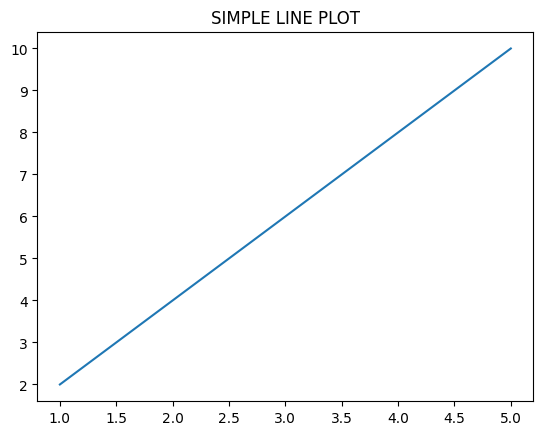

In [ ]:
import matplotlib.pyplot as plt

X  = [1,2,3,4,5]
Y  =[2,4,6,8,10]

plt.plot(X,Y)

plt.title("SIMPLE LINE PLOT")
plt.xlable("X-axis")
plt.ylable("Y-axix")
plt.grid(True)

plt.show()

**TASK 4:**
**WATER JUG PROBLEM:**

In [4]:
import time
import tracemalloc
from collections import deque

jug1_capacity = 4
jug2_capacity = 3
target = 2

def get_successors(state):
    a, b = state
    successors = []
    successors.append((jug1_capacity, b))
    successors.append((a, jug2_capacity))
    successors.append((0, b))
    successors.append((a, 0))
    pour = min(a, jug2_capacity - b)
    successors.append((a - pour, b + pour))
    pour = min(b, jug1_capacity - a)
    successors.append((a + pour, b - pour))
    return successors

def bfs():
    start_time = time.time()
    tracemalloc.start()
    visited = set()
    queue = deque([((0, 0), [])])
    steps = 0
    while queue:
        (a, b), path = queue.popleft()
        steps += 1
        if (a, b) in visited:
            continue
        visited.add((a, b))
        path = path + [(a, b)]
        if a == target or b == target:
            current, peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            end_time = time.time()
            return {
                "path": path,
                "steps": steps,
                "time": end_time - start_time,
                "memory": peak / 1024
            }
        for next_state in get_successors((a, b)):
            if next_state not in visited:
                queue.append((next_state, path))
    tracemalloc.stop()
    return None

def dfs():
    start_time = time.time()
    tracemalloc.start()
    visited = set()
    stack = [((0, 0), [])]
    steps = 0
    while stack:
        (a, b), path = stack.pop()
        steps += 1
        if (a, b) in visited:
            continue
        visited.add((a, b))
        path = path + [(a, b)]
        if a == target or b == target:
            current, peak = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            end_time = time.time()
            return {
                "path": path,
                "steps": steps,
                "time": end_time - start_time,
                "memory": peak / 1024
            }
        for next_state in get_successors((a, b)):
            if next_state not in visited:
                stack.append((next_state, path))
    tracemalloc.stop()
    return None

bfs_result = bfs()
dfs_result = dfs()

print("===== WATER JUG PROBLEM COMPARISON =====")
print("\n--- BFS ---")
print(f"Path: {bfs_result['path']}")
print(f"Steps Taken: {bfs_result['steps']}")
print(f"Time Taken: {bfs_result['time']:.6f} seconds")
print(f"Memory Used: {bfs_result['memory']:.2f} KB")

print("\n--- DFS ---")
print(f"Path: {dfs_result['path']}")
print(f"Steps Taken: {dfs_result['steps']}")
print(f"Time Taken: {dfs_result['time']:.6f} seconds")
print(f"Memory Used: {dfs_result['memory']:.2f} KB")

print("\n--- COMPARISON SUMMARY ---")
if bfs_result['time'] < dfs_result['time']:
    print("BFS is faster.")
else:
    print("DFS is faster.")

if bfs_result['memory'] < dfs_result['memory']:
    print("BFS uses less memory.")
else:
    print("DFS uses less memory.")


===== WATER JUG PROBLEM COMPARISON =====

--- BFS ---
Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
Steps Taken: 11
Time Taken: 0.000174 seconds
Memory Used: 1.63 KB

--- DFS ---
Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
Steps Taken: 5
Time Taken: 0.000078 seconds
Memory Used: 0.90 KB

--- COMPARISON SUMMARY ---
DFS is faster.
DFS uses less memory.


**TASK 5 **
MAZE:

In [5]:
import heapq

maze = [
    [1, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0]
]

start = (5, 0)
goal = (0, 5)
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor[0]][neighbor[1]] == 1:
                    continue
                tentative_g = g_score[current] + 1
                if tentative_g < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
    return None

path = a_star_search(maze, start, goal)

if path:
    print("✅ Path found from A to Y:")
    for step in path:
        print(step)
else:
    print("❌ No path found.")


✅ Path found from A to Y:
(5, 0)
(4, 0)
(3, 0)
(2, 0)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(0, 4)
(0, 5)
